<a href="https://colab.research.google.com/github/sovunia-hub/machine-learning/blob/main/wine-clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"grandwizard","key":"2b7034756245e2aef569c1d7e2d21513"}'}

In [ ]:
!mkdir ~/.kaggle #создание папки
!cp kaggle.json ~/.kaggle/ #копия этого файла в эту папку
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d harrywang/wine-dataset-for-clustering

  0% 0.00/4.36k [00:00<?, ?B/s]
100% 4.36k/4.36k [00:00<00:00, 7.64MB/s]


In [ ]:
!unzip wine-dataset-for-clustering.zip

Archive:  wine-dataset-for-clustering.zip
  inflating: wine-clustering.csv     


In [ ]:
data = pd.read_csv('wine-clustering.csv')
print(data.shape)
data.head()

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
mms = MinMaxScaler()
mm_data = pd.DataFrame(mms.fit_transform(data), columns=data.columns)
mm_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


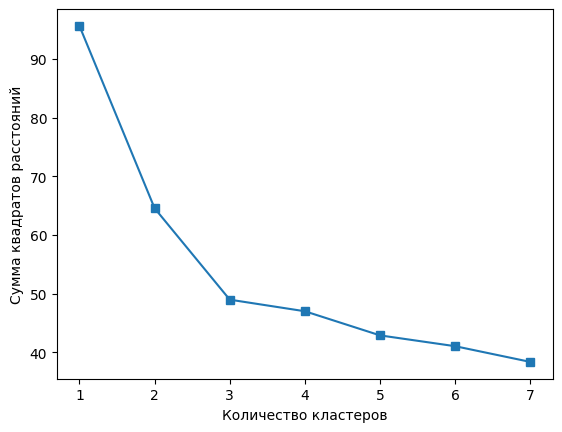

In [ ]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(mm_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

Оптимальное количество кластеров: 3


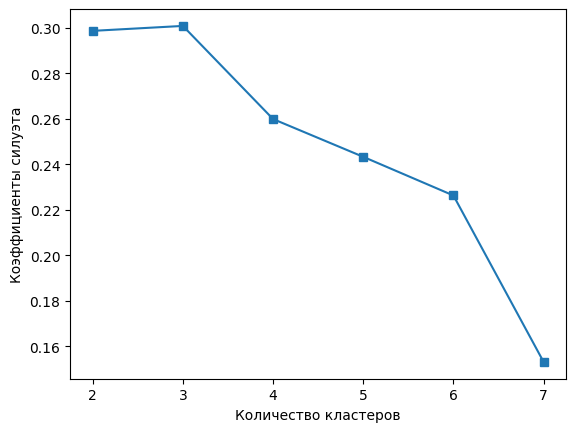

In [ ]:
k_values = range(2, 8)
silhouette_scores = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mm_data)
    score = silhouette_score(mm_data, kmeans.labels_)
    silhouette_scores.append(score)
optimal_k_index = silhouette_scores.index(max(silhouette_scores))
optimal_k = k_values[optimal_k_index]
print(f"Оптимальное количество кластеров: {optimal_k}")

# Отрисовка коэффициентов силуэта
plt.plot(range(2, 8), silhouette_scores, marker='s')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициенты силуэта')
plt.show()

In [ ]:
pca = PCA(n_components=2)

kmeans = KMeans(n_clusters=3, random_state=123, n_init='auto').fit(mm_data)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(mm_data))

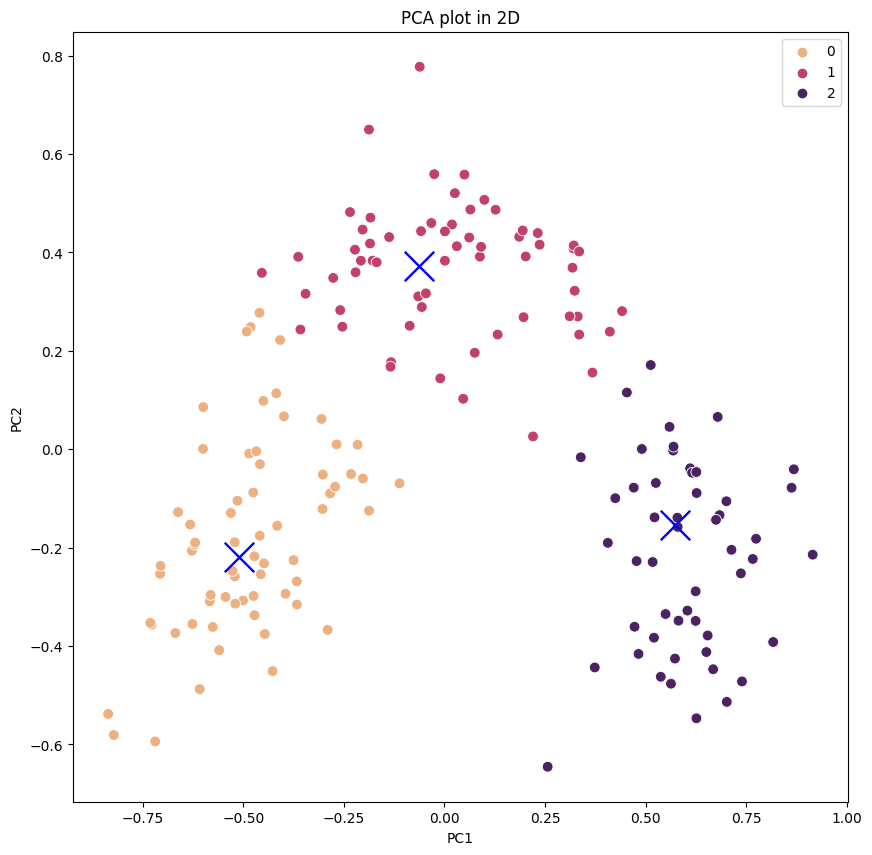

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0],
                y = principal_df.iloc[:,1],
                hue = pred_k,
                palette="flare",
                s=60)
sns.scatterplot(x = centroids_pca[:,0],
                y =  centroids_pca[:,1],
                marker="x",
                s=450,
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [ ]:
def PCAplot3D(x_data, y_data):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components,
        x=0, y=1, z=2,
        color=y_data,
        size=0.1*np.ones(len(x_data)),
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

In [ ]:
PCAplot3D(mm_data, pred_k)

In [ ]:
dbscan = DBSCAN(eps=0.45, min_samples=5)
dbscan.fit(mm_data)
PCAplot3D(mm_data, dbscan.labels_)

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical = hierarchical.fit(mm_data)
PCAplot3D(mm_data, hierarchical.labels_)

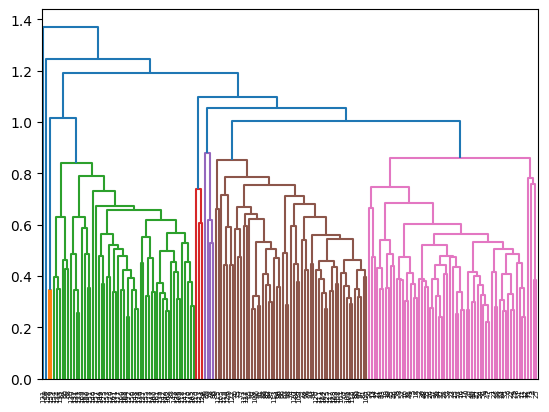

In [ ]:
linked = linkage(mm_data, 'average')
dendrogram(linked)
plt.show()